# Ford Gobike Trip Data Analysis
## by Eman Khalaf

## Workflow of the analysis
### Overview about the project and the dataset
- Here, we will be exploring the trip data of the Ford gobike rental system.
- At the beginning, we will perform initial assessment through checking the shape and composition of the data.
- Then, we will be cleaning the data  accordingly.
- Eventually, we will be picking up variables that look important for the data analysis and extract them into a new dataframe.

### Data Exploration
- Univariate Exploration 
- Bivariate Exploration 
- Multivariate Exploration 

### Key Findings and Conclusions

In [1]:
# import all needed packages for analyses and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [4]:
# load in the dataset into a pandas dataframe, and display the top 5 rows of the dataframe 
df = pd.read_csv('fordgobike-tripdata.csv')
df.head(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [5]:
# Overview on data composition
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [6]:
# Check for duplicates
df.duplicated().sum()

0

## What is the structure of your dataset?

- The data contain 183412 records for bike trips  with 16 features/variables (duration_sec, start_time, end_time, start_station_id, start_station_name, start_station_latitude, start_station_longitude, end_station_id, end_station_name, end_station_latitude ,end_station_longitude, bike_id, user_type, member_birth_year, member_gender, bike_share_for_all_trip). 9 out of the 16 features are numerical, whereas 7 are of object type. There are missing values in start_station_id,  start_station_name, end_station_id, end_station_name, member_birth_year, and member_gender variables, however, there are no duplicates.

## Preliminary Wrangling

In [7]:
##change datatype of start_time and end_time to datetime.
df.start_time = pd.to_datetime(df.start_time)
df.end_time = pd.to_datetime(df.end_time)

In [8]:
# change datatype of user type, gender and bike_share_for_all_trip to category
df.user_type = df.user_type.astype('category')
df.member_gender = df.member_gender.astype('category')
df.bike_share_for_all_trip = df.bike_share_for_all_trip.astype('category')

### Columns/variables to drop
- We will be dropping the following columns from the dataframe; start_station_id, start_station_latitude, start_station_longitude, end_station_id, end_station_latitude ,and end_station_longitude. Though, I will keep bike_id variable to use it as a counter for records in the downstream analysis, in particular it does not have any missing data.
- The reason behind removing these variables since they do not provide us with any essential information for the analysis.

In [9]:
# Drop unneccessary variables from the dataframe
columns_to_drop = ['start_station_id', 'start_station_latitude', 'start_station_longitude',
                   'end_station_id', 'end_station_latitude', 'end_station_longitude']

df.drop(columns = columns_to_drop, inplace = True)

In [10]:
#check changes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 10 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183412 non-null  int64         
 1   start_time               183412 non-null  datetime64[ns]
 2   end_time                 183412 non-null  datetime64[ns]
 3   start_station_name       183215 non-null  object        
 4   end_station_name         183215 non-null  object        
 5   bike_id                  183412 non-null  int64         
 6   user_type                183412 non-null  category      
 7   member_birth_year        175147 non-null  float64       
 8   member_gender            175147 non-null  category      
 9   bike_share_for_all_trip  183412 non-null  category      
dtypes: category(3), datetime64[ns](2), float64(1), int64(2), object(2)
memory usage: 10.3+ MB


#### Calculate the age of members using the given information in member_birth_year
- Since we are currently in 2021, so we will be subtracting the given years in member_birth_year column from 2021 for every record. Then, create a new column; "member_age" to include these values parallel to their corresponding birth years of members.

In [11]:
#Calculate the age of each member and add it into a new column, member_age
df['member_age'] = 2021 - df['member_birth_year']
#check changes
df['member_age'].sample(3)

171554    33.0
60574     42.0
55111     55.0
Name: member_age, dtype: float64

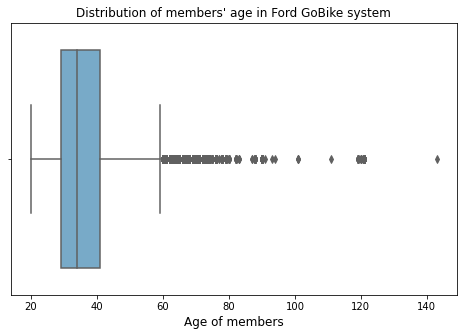

In [12]:
#Check data distribution in member_age variable
plt.figure(figsize=(8,5))
sb.boxplot(data=df, x='member_age',palette='Blues', orient='h')
plt.title("Distribution of members' age in Ford GoBike system", fontsize=12)
plt.xlabel("Age of members", fontsize=12);

In [13]:
# print descriptive statistics
df.describe()

,duration_sec,bike_id,member_birth_year,member_age
count,183412.000000,183412.000000,175147.000000,175147.000000
mean,726.078435,4472.906375,1984.806437,36.193563
std,1794.389780,1664.383394,10.116689,10.116689
min,61.000000,11.000000,1878.000000,20.000000
25%,325.000000,3777.000000,1980.000000,29.000000
50%,514.000000,4958.000000,1987.000000,34.000000
75%,796.000000,5502.000000,1992.000000,41.000000
max,85444.000000,6645.000000,2001.000000,143.000000


- From the displayed boxplot and the summary of descriptive statistics above, we noticed that the majority of members are between 20-60 years old (minimum age of 20, 75% of 41 years old), however, the maximum age of 143 years old. Hence, members aged >60 are outliers, and we will be removing their records from the dataset. 

In [14]:
# Remove members aged >60 from the dataset
df = df[df['member_age']<=60]
#calculate the mean of member age
df['member_age'].mean()

35.30287450201544

#### Adding the age group
- We will categorize the member_age into 5 groups and include them in a new column, so each group will face its corresponding value in the member_age column. 
- To do so, guidance from the following link was used:  https://stackoverflow.com/questions/52753613/grouping-categorising-ages-column-in-python-pandas

In [15]:
#Categorize members' age into 6 age groups
age_bins = [11, 20, 30, 40, 50, 60]
age_labels = ['11 - 20', '21 - 30', '31 - 40', '41 - 50', '51 - 60']
# Create a new variable to include the age group corresponding to each record
df['age_group'] = pd.cut(df['member_age'], bins = age_bins, labels = age_labels, right = True)
df[['member_age', 'age_group']].sample(5)

,member_age,age_group
89884,27.0,21 - 30
159996,53.0,51 - 60
156178,38.0,31 - 40
117542,33.0,31 - 40
81237,26.0,21 - 30


#### Display the date in 3 new columns through extracting the month name, weekday name, and hour from the start_time variable

In [16]:
# Extract start time month name
df['start_time_month']=df['start_time'].dt.strftime('%B')
# Extract start time weekdays
df['start_time_weekday']=df['start_time'].dt.strftime('%a')
# extract start time hour
df['start_time_hour']=df['start_time'].dt.hour

In [17]:
#Explore value counts in each newly created time column
print(df.start_time_month.value_counts())
print(df.start_time_weekday.value_counts())
print(df.start_time_hour.value_counts())

February    170186
Name: start_time_month, dtype: int64
Thu    32775
Tue    29804
Wed    27652
Fri    26883
Mon    24975
Sun    14082
Sat    14015
Name: start_time_weekday, dtype: int64
17    20469
8     19887
18    15795
9     14825
16    13067
7      9969
19     9273
15     8315
12     7899
13     7709
10     7695
14     7358
11     7156
20     6142
21     4335
6      3151
22     2747
23     1519
0       883
5       798
1       516
2       353
4       175
3       150
Name: start_time_hour, dtype: int64


In [18]:
# Check changes
df.head(3)

,duration_sec,start_time,end_time,start_station_name,end_station_name,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,member_age,age_group,start_time_month,start_time_weekday,start_time_hour
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,Montgomery St BART Station (Market St at 2nd St),Commercial St at Montgomery St,4902,Customer,1984.0,Male,No,37.0,31 - 40,February,Thu,17
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,Market St at Dolores St,Powell St BART Station (Market St at 4th St),5905,Customer,1972.0,Male,No,49.0,41 - 50,February,Thu,12
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,Grove St at Masonic Ave,Central Ave at Fell St,6638,Subscriber,1989.0,Other,No,32.0,31 - 40,February,Thu,17


- When we checked the value_counts of the newly created columns from start_time variable, we noticed that all the data were collected in February, 2019 including 7/24 schedule.

#### Select the top 10 start stations from start_station_name based on frequent use of bike trips.

In [19]:
# Select the top 10 starting stations
start_station10 = df['start_station_name'].value_counts().index[:10]

In [20]:
# Create a new dataframe including trips only from top 10 start stations
df_start_station10 = df.loc[df['start_station_name'].isin(start_station10)]
df_start_station10.sample(3)

,duration_sec,start_time,end_time,start_station_name,end_station_name,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,member_age,age_group,start_time_month,start_time_weekday,start_time_hour
8968,609,2019-02-28 07:50:48.758,2019-02-28 08:00:57.965,Howard St at Beale St,4th St at 16th St,6095,Subscriber,1992.0,Male,No,29.0,21 - 30,February,Thu,7
151219,674,2019-02-06 17:24:00.482,2019-02-06 17:35:14.976,Powell St BART Station (Market St at 5th St),Townsend St at 7th St,5264,Subscriber,1988.0,Male,No,33.0,31 - 40,February,Wed,17
19235,660,2019-02-26 17:15:34.851,2019-02-26 17:26:35.843,Powell St BART Station (Market St at 4th St),Church St at Duboce Ave,6367,Subscriber,1988.0,Female,No,33.0,31 - 40,February,Tue,17


In [21]:
# check the distribution of bike trips across the top 10 start stations
df_start_station10.start_station_name.value_counts()

Market St at 10th St                                         3616
San Francisco Caltrain Station 2  (Townsend St at 4th St)    3297
Berry St at 4th St                                           2860
Montgomery St BART Station (Market St at 2nd St)             2647
Powell St BART Station (Market St at 4th St)                 2555
San Francisco Caltrain (Townsend St at 4th St)               2456
San Francisco Ferry Building (Harry Bridges Plaza)           2394
Howard St at Beale St                                        2159
Powell St BART Station (Market St at 5th St)                 2114
Steuart St at Market St                                      2090
Name: start_station_name, dtype: int64

In [22]:
# Check the structure of the cleaned dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 170186 entries, 0 to 183411
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             170186 non-null  int64         
 1   start_time               170186 non-null  datetime64[ns]
 2   end_time                 170186 non-null  datetime64[ns]
 3   start_station_name       169992 non-null  object        
 4   end_station_name         169992 non-null  object        
 5   bike_id                  170186 non-null  int64         
 6   user_type                170186 non-null  category      
 7   member_birth_year        170186 non-null  float64       
 8   member_gender            170186 non-null  category      
 9   bike_share_for_all_trip  170186 non-null  category      
 10  member_age               170186 non-null  float64       
 11  age_group                170186 non-null  category      
 12  start_time_month

- After cleaning, the dataset now contains 170186 records with 15 different features/variables to include in the downstream analyses.

# What is/are the main feature(s) of interest in your dataset?
From data exploation, I found 8 interesting features to focus on through out the analyses. These variables are:
- Average trip duration
- Most common weekday for renting bikes
- Most common day hour for renting bikes
- The most common age group using Gobike rental service
- The most common gender that uses Gobike rental service
- Impact of user_type
- Impact of bike_share_for_all_trip variable on bike trips
- Most common start_station_name 

# What features in the dataset do you think will help support your investigation into your feature(s) of interest?
- I expect weekday, week hour, gender, and age, user_type are the major features influencing the rental rates of Gobike service.

# Univariate Exploration

#### I'll start by looking at the duration of bike trips across the dataset.

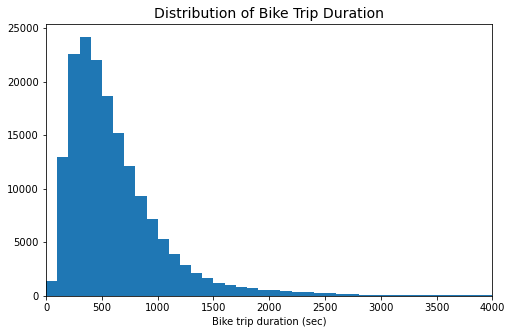

In [23]:
# start with a standard-scaled plot (histogram)
binsize = 100
bins = np.arange(0, df['duration_sec'].max()+binsize, binsize)
plt.figure(figsize=[8, 5])
plt.xlim(0, 4000)
plt.hist(data = df, x = 'duration_sec', bins = bins)
plt.title('Distribution of Bike Trip Duration', fontsize = 14);
plt.xlabel('Bike trip duration (sec)')
plt.show();

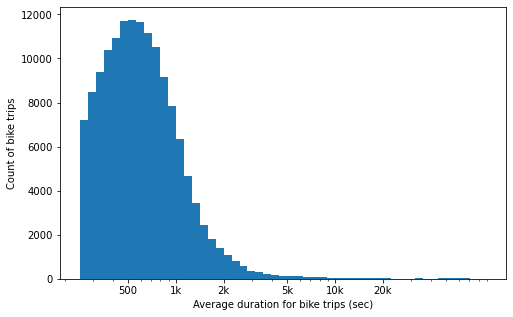

In [24]:
# There's a long tail in the distribution, so let's put it on a log scale instead
log_binsize = 0.05
bins = 10 ** np.arange(2.4, np.log10(df['duration_sec'].max())+log_binsize, log_binsize)
# create a histogram
plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'duration_sec', bins = bins)
plt.xscale('log')
plt.xticks([500, 1e3, 2e3, 5e3, 1e4, 2e4], [500, '1k', '2k', '5k', '10k', '20k'])
plt.xlabel('Average duration for bike trips (sec)')
plt.ylabel('Count of bike trips')
plt.show();

- Since we have huge variations in duration_sec variable (see the summary of descriptive statistics above) along with the constructed histograms above, so I adjusted the x-axis limit to 4000 seconds. The curve is skewed to the left, so, I transformed the data into the log scale. However, the majority of data are still displayed below 2000 seconds with maximum value at approximately 400-600 seconds equivalent to 7-10 minutes.That means the majority of the service users are renting bikes for very quick trips.

#### Estimate the weekly/hourly rentals of bikes in February, 2019 through the Gobike service

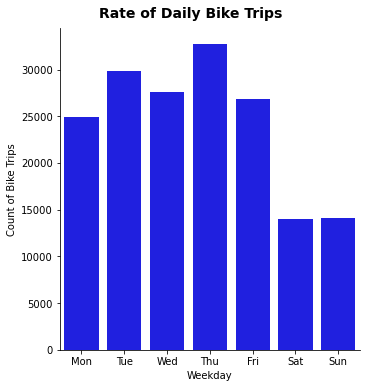

In [25]:
# First create a list of weekdays, then generate a categorical plot to show the daily rate of bike trips in Gobike service
weekday = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
g = sb.catplot(data=df, x='start_time_weekday', kind='count', color='blue', order=weekday)
g.set_axis_labels("Weekday", "Count of Bike Trips")
g.fig.suptitle('Rate of Daily Bike Trips', y=1.03, fontsize=14, fontweight='bold');

- From the chart above, we noticed that on weekends the rate of bike rent has the lowest value, whereas Thursday followed by Tuesday showed the highest rates of bike trips in Gobike system.

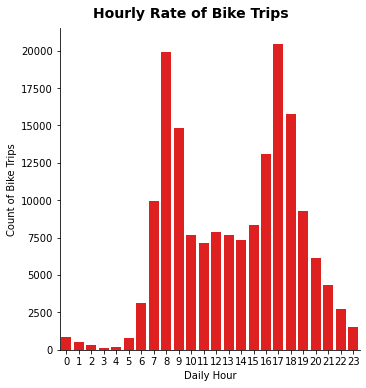

In [26]:
# create a categorical plot to show the hourly rate of bike trips in Gobike system 
g = sb.catplot(data=df, x='start_time_hour', kind='count', color='Red')
g.set_axis_labels("Daily Hour", "Count of Bike Trips")
g.fig.suptitle('Hourly Rate of Bike Trips', y=1.03, fontsize=14, fontweight='bold');

- From the above histogram, we noticed that the rate of bike rent starts to increase remarkably from 7 am to reach the maximum at 8 am, then starts to decline gradually with a steady state within time interval 10am-3pm, then starts to increase to reach the maximum rate again at 5pm then declines gradually. It seems that the rent rate reaches its maximum at times where members go to their work at early morning (7-9 am) and leave at evening (4-6 pm).

#### Let us test the contribution of member age group in the rental rate

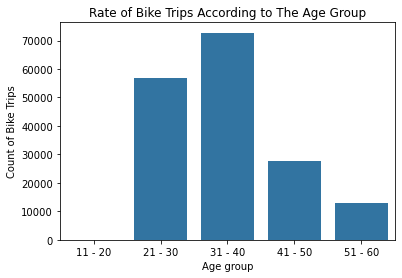

In [28]:
# create a histogram to show the count of bike users in each age group 
base_color = sb.color_palette()[0]
sb.countplot(data = df, x = 'age_group', color = base_color)
plt.title('Rate of Bike Trips According to The Age Group')
plt.xlabel('Age group')
plt.ylabel('Count of Bike Trips')
plt.show();

- From the above plot, we noticed that users within age_group 31-40 years old use the service most frequently followed by those within the age_group (21-30) years old. That means young adults mostly employed are the major users of Gobike service. 

#### Let us explore the distribution of bike users based on their gender.

In [27]:
# Check value_counts in the gender variable
df.member_gender.value_counts()

Male      126461
Female     40137
Other       3588
Name: member_gender, dtype: int64

In [28]:
# calculate % of each group in the gender variable
male = df.query('member_gender == "Male"')['bike_id'].count()
female = df.query('member_gender == "Female"')['bike_id'].count()
other = df.query('member_gender == "Other"')['bike_id'].count()
male_proportion = male / df['bike_id'].count()
female_proportion = female / df['bike_id'].count()
other_proportion = other / df['bike_id'].count()

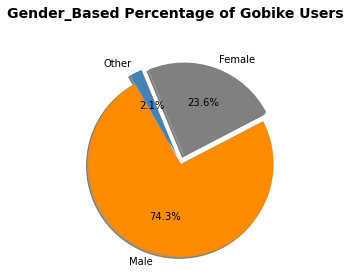

In [29]:
# construct a pie chart for the member gender distribution
labels = ['Male', 'Female', 'Other']
sizes = [male_proportion, female_proportion, other_proportion]
colors = ['darkorange', 'grey', 'steelblue']
explode = (0, 0.1, 0.1)

plt.pie(sizes, explode=explode, labels=labels, colors = colors,
        autopct='%1.1f%%', shadow=True, startangle=120)
plt.axis('equal')

plt.suptitle('Gender_Based Percentage of Gobike Users', y=1.03, fontsize=14, fontweight='bold');

- From the demonstrated pie chart above, we found that males are the most frequent users of Gobike service accounting for 74.3% of the total users, followed by far behind the females' category.

#### Let us test the impact of user_type on bike rental rate

In [30]:
#Check value_counts for user_type variable
df.user_type.value_counts()

Subscriber    153866
Customer       16320
Name: user_type, dtype: int64

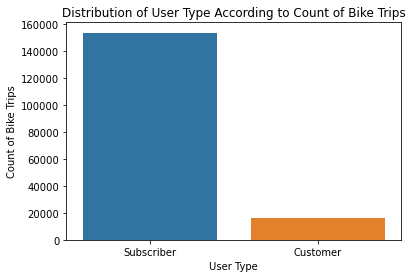

In [31]:
# Create a barplot showing the count of each group of users regarding the bike trips usage.
g = sb.countplot(data=df, x="user_type", order=df.user_type.value_counts().index)
g.set_xlabel('User Type')
g.set_ylabel('Count of Bike Trips')
plt.title('Distribution of User Type According to Count of Bike Trips')
plt.show();

- From the above plot, we noticed that the majority of Gobike users are subscribers/members in the service.

#### Test the impact of bike_share_for_all_trip variable on bike trips

In [32]:
df.bike_share_for_all_trip.value_counts()

No     153519
Yes     16667
Name: bike_share_for_all_trip, dtype: int64

In [33]:
# calculate % of each group in bike_share_for_all_trip variable
yes = df.query('bike_share_for_all_trip == "Yes"')['bike_id'].count()
no = df.query('bike_share_for_all_trip == "No"')['bike_id'].count()
yes_proportion = yes / df['bike_id'].count()
no_proportion = no / df['bike_id'].count()

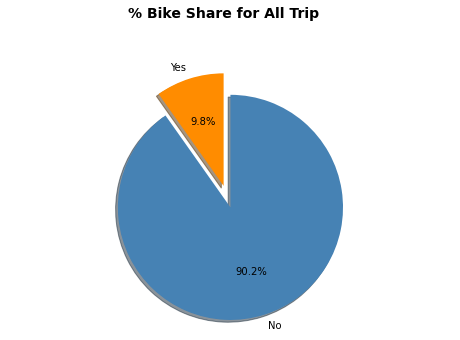

In [34]:
# construct a pie chart 
plt.figure(figsize=[8, 5])
labels = ['Yes', 'No']
sizes = [yes_proportion, no_proportion]
colors = ['darkorange', 'steelblue']
explode = (0.1, 0.1)

plt.pie(sizes, explode=explode, labels=labels, colors = colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')

plt.suptitle('% Bike Share for All Trip', y=1.03, fontsize=14, fontweight='bold');

- From the above pie chart, we could see that the vast majority of users accounting for 90.2% of the total users do not share bikes for all trips, that porobably due to the majority of trips are too short to share bikes. 

#### Let us visualize the no. of bike trips from the top 10 start stations

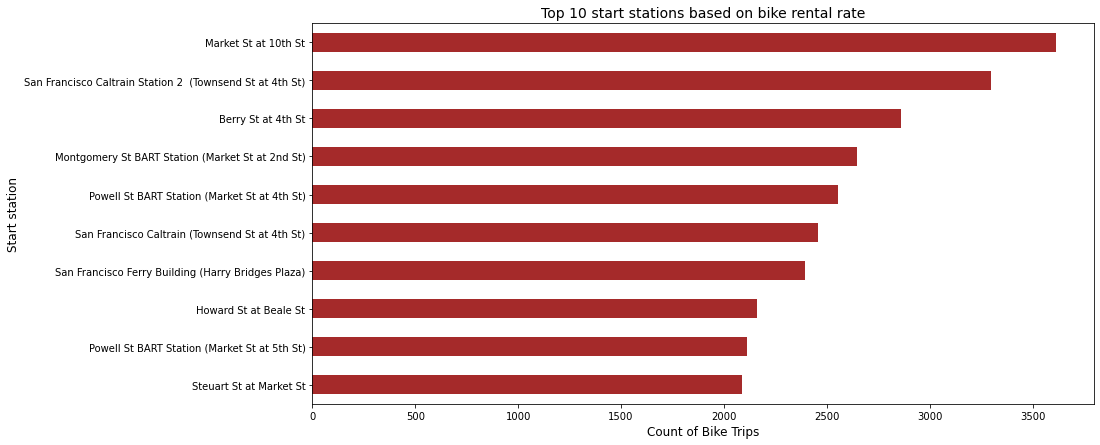

In [35]:
# Construct a horizontal bar plot
plt.figure(figsize=(14,7))
df_start_station10['start_station_name'].value_counts().sort_values(ascending=True).plot(kind='barh', color='brown');
plt.title('Top 10 start stations based on bike rental rate', fontsize=14)
plt.xlabel('Count of Bike Trips', fontsize=12)
plt.ylabel('Start station', fontsize=12);

- From the bar chart above, we noticed that Market station at 10th street has the highest rate of bike trips as a start station. Furthermore, half of the top start stations are Market stations.

# Bivariate Exploration

#### Let us check the pattern of hourly sharing bikes according to member gender

In [37]:
#create a new df by grouping variables of interest (start_time_hour, member_gender)
df_gender_per_hour = df.groupby(["start_time_hour", "member_gender"]).size().reset_index()

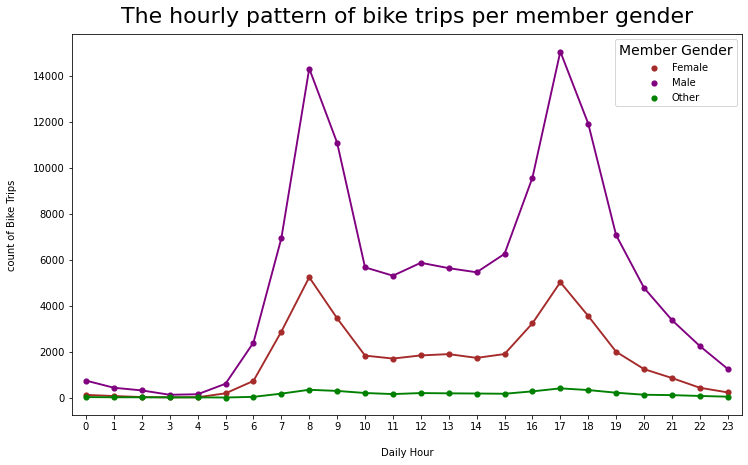

In [38]:
#Plot point plot (time series plot)
plt.figure(figsize=(12,7))
gender_palette = {'Male':'purple', 'Female':'brown', 'Other':'green'}
ax = sb.pointplot(x='start_time_hour', y=0, hue='member_gender', palette=gender_palette, scale=.7, data=df_gender_per_hour)
plt.title('The hourly pattern of bike trips per member gender', fontsize=22, y=1.015)
plt.xlabel('Daily Hour', labelpad=16)
plt.ylabel('count of Bike Trips', labelpad=16)
leg = ax.legend()
leg.set_title('Member Gender',prop={'size':14})

- As shown in the time series plot above, both male and females are using Gobike service with same hourly rates including peaks at work times (7-9 am, 4-6 pm), whereas the other gender is using the service constantly over the entire day.

#### Let us test the pattern of weekly usage of Gobike service according to the age_group

In [39]:
#create a new df by grouping variables of interest (start_time_hour, age_group)
df_age_gp_per_hour = df.groupby(["start_time_hour", "age_group"]).size().reset_index()

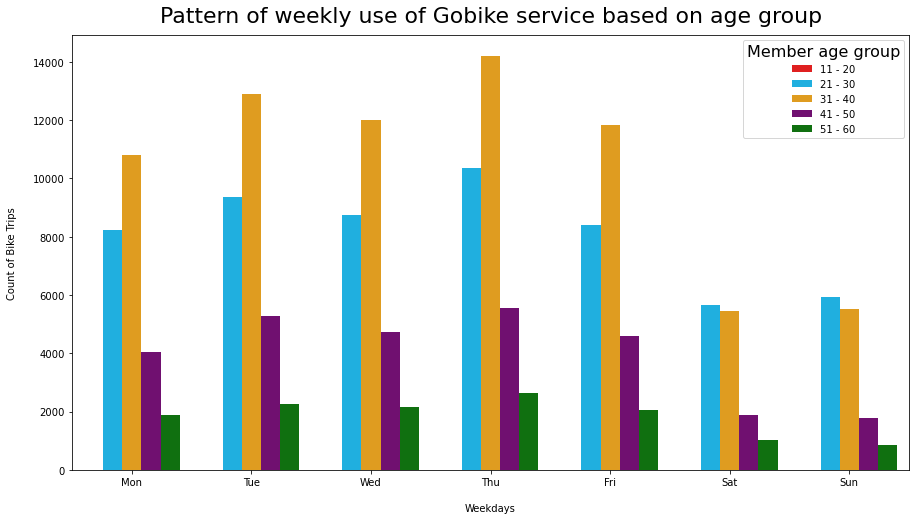

In [40]:
plt.figure(figsize=(15,8))
weekday = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
age_palette = {'11 - 20': 'red', '21 - 30': 'deepskyblue', '31 - 40': 'orange', '41 - 50': 'purple', '51 - 60': 'green'}
ax = sb.countplot(x='start_time_weekday', hue='age_group', palette=age_palette, order = weekday, data=df[df['age_group'].isin(['11 - 20','21 - 30', '31 - 40', '41 - 50', '51 - 60'])].sort_values(by=['start_time_weekday', 'age_group']))
plt.title('Pattern of weekly use of Gobike service based on age group', fontsize=22, y=1.015)
plt.xlabel('Weekdays', labelpad=16)
plt.ylabel('Count of Bike Trips', labelpad=16)
leg = ax.legend()
leg.set_title('Member age group',prop={'size':16})

- From the clustered bar plot above, we noticed that members in age group 31-40 are the most frequent users of the service across the week days except for the weekend, where members in age group 21-30 have a little bit higher rate. Regarding other groups, the rate is relatively consistent across the week days. 

#### Let us check the pattern of user_type versus trip duration

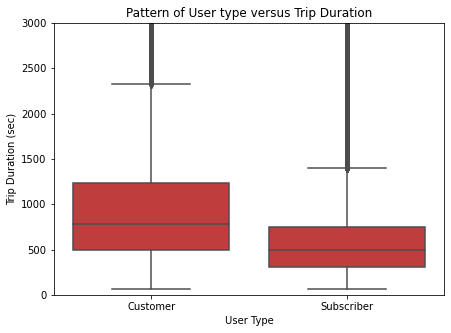

In [41]:
plt.figure(figsize = [7, 5])
base_color = sb.color_palette()[3]
sb.boxplot(data = df, x = 'user_type', y = 'duration_sec', color = base_color)
plt.ylim([0, 3000])
plt.xlabel('User Type')
plt.ylabel('Trip Duration (sec)')
plt.title('Pattern of User type versus Trip Duration')
plt.show();

- From the displayed boxplot above, we noticed that the majority of subscribers use Gobike service for relatively shorter trips compared to customers.

#### Let us get a deeper visualization for the correlation between member_age and the trip duration.

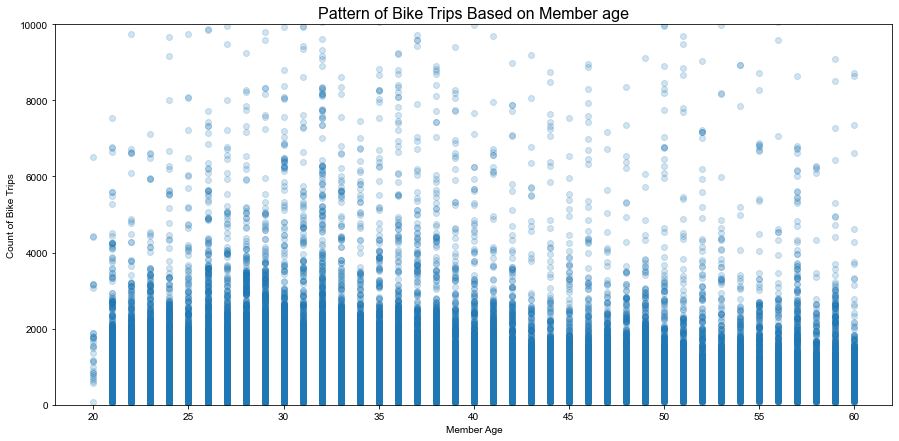

In [42]:
#Construct a scatter plot of member_age and duration_sec
plt.figure(figsize = (15, 7))
plt.scatter(data = df, x = 'member_age', y = 'duration_sec', alpha = 0.2)
plt.style.use('seaborn')
plt.title('Pattern of Bike Trips Based on Member age', fontsize = 16)
plt.xlabel('Member Age')
plt.ylim([0, 10000])
plt.ylabel('Count of Bike Trips');

- Since the count of bike trips is extreme, upto 80000 trips, so I limited the y-scale to 10000 for clearer visualization
- According to the scatter plot shown above, members within age of late 20's and early 30's are the most frequent users of Gobike service. 

#### Distribution of bike trips' count across most frequent start_stations 

In [43]:
# calculate index-object in order to apply the faceted grid in descending order according to the top 10 start_station
count_start_station = df_start_station10.groupby('start_station_name').count()
count_order = count_start_station.sort_values('duration_sec', ascending = False).index

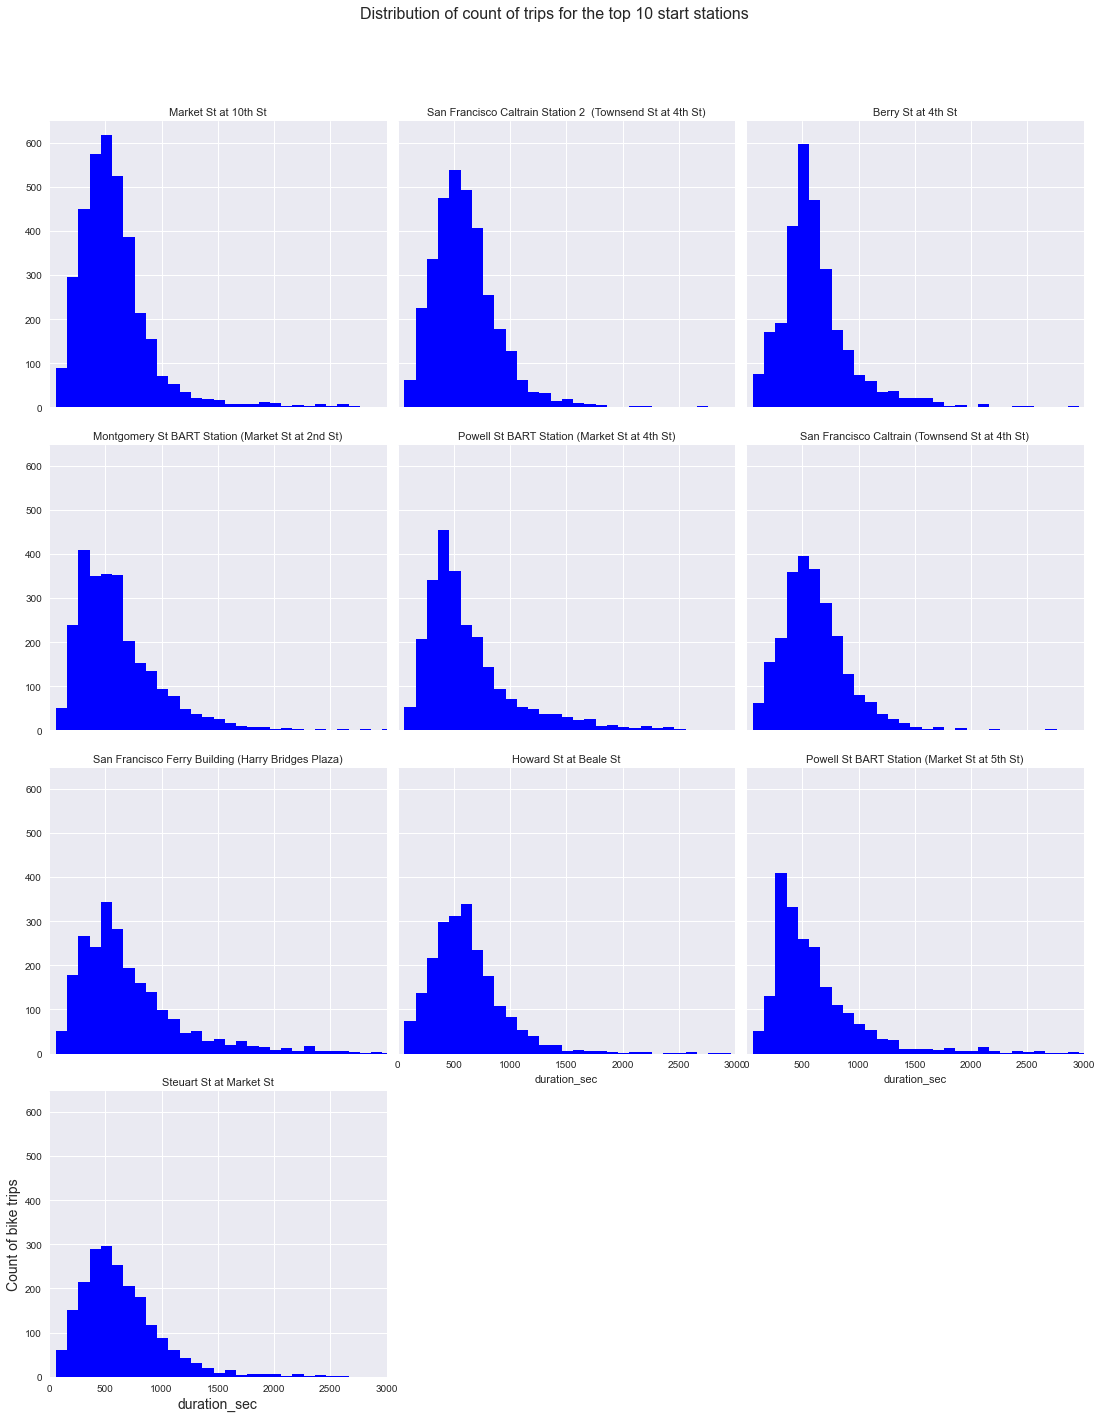

In [47]:
# construct set of histogram plots to show the distribution of count of bike trips according to the top 10 start stations
g = sb.FacetGrid(data = df_start_station10, col = 'start_station_name', col_wrap = 3, height = 5, col_order = count_order, sharey=True)
g.map(plt.hist, 'duration_sec', bins = np.arange(df['duration_sec'].min(), df['duration_sec'].max()+1, 100), color='blue')
plt.ylabel('Count of bike trips', fontsize=14)
plt.xlabel('duration_sec', fontsize=14)
g.set_titles('{col_name}')
plt.xlim(0, 3000)
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Distribution of count of trips for the top 10 start stations', fontsize=16);

- Interestingly, although the top 3 start stations showed the highest count of bike trips, but the majority of their trips were shorter in duration compared to the rest of the top 10 stations 

# Multivariate Exploration

#### Let us visualize the distribution of bike trips across members' age and gender

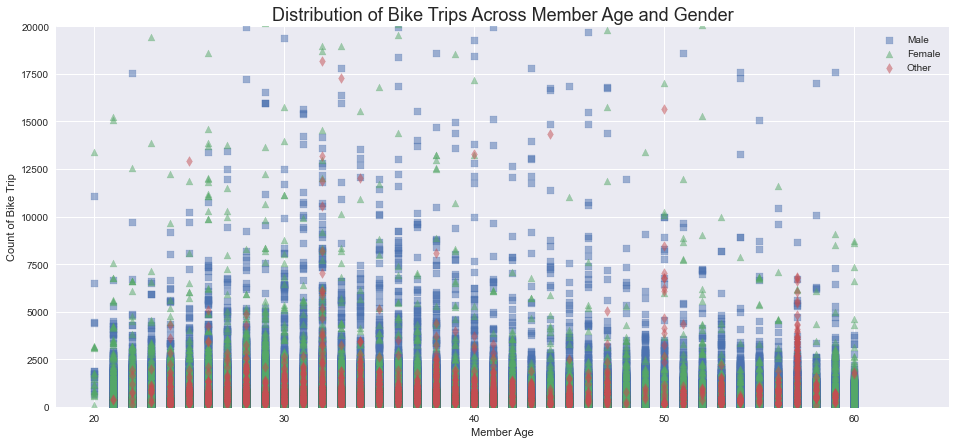

In [48]:
df_samp = df.sample(170000)

plt.figure(figsize = (16,7))

cat_markers = [['Male', 's'],
               ['Female', '^'],
               ['Other', 'd']]

for cat, marker in cat_markers:
    df_gender = df_samp[df_samp['member_gender'] == cat]
    plt.scatter(data = df_gender, x = 'member_age', y = 'duration_sec', marker = marker, alpha = 0.5);
plt.legend(['Male', 'Female', 'Other']);
plt.xlim(18, 65);
plt.ylim(0, 20000);
plt.title('Distribution of Bike Trips Across Member Age and Gender', fontsize = 18);
plt.xlabel('Member Age');
plt.ylabel('Count of Bike Trip');
plt.style.use('seaborn')

- As we see from the above scatter plot, the highest use of Gobike service from males (denoted by blue squares) followed by far behind females (denoted by green triangles), and at the bottom other's gender (red diamonds). 

#### Let us explore the relationship between user type, trip durtion and possibility of bike share all the trip

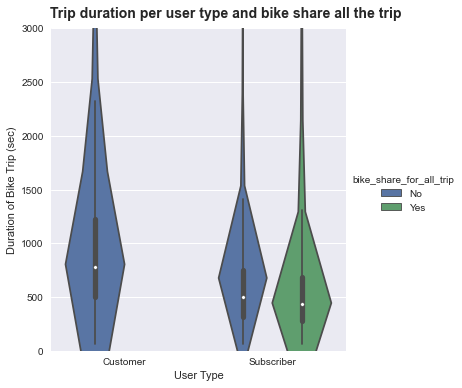

In [49]:
# Construct a violinplot for the trip duration (sec), bike_share_for_all_trip across the user types
g = sb.catplot(data=df, x='user_type', y="duration_sec", hue="bike_share_for_all_trip", kind="violin")

g.set_axis_labels("User Type", "Duration of Bike Trip (sec)")
g._legend.set_title('bike_share_for_all_trip')
plt.ylim(0, 3000)
g.fig.suptitle('Trip duration per user type and bike share all the trip', y=1.03, fontsize=14, fontweight='bold');

- From the violin plot above, we noticed that only subscribers may or may not share the bike for all the trip, but all customers do not. In addition, most subscribers share the bike for all the trip for shorter durations compared to those who do not from the same group (subscribers).

#### Let us explore the pattern of the relationship across subscribers (constitute the majority of users), age group, and daily hours during the entire week
- I will be performing this task through adapting heatmaps

In [50]:
# Extract all subscribers within the age groups (20-60)
df_subscriber = df[(df['member_age']>=20) & (df['member_age']<60) 
                              &(df['start_time_hour']>5)&(df['user_type']=='Subscriber')
                             ].groupby(['start_time_weekday', 'start_time_hour']).agg({'bike_id' : 'count'}).rename(columns={'bike_id':'count'}).reset_index()

In [51]:
# Extract subscribers of age group (20-30)
df1_subscribe_hr = df[(df['member_age']>=20) & (df['member_age']<30) 
                              &(df['start_time_hour']>5)&(df['user_type']=='Subscriber')
                             ].groupby(['start_time_weekday', 'start_time_hour']).agg({'bike_id' : 'count'}).rename(columns={'bike_id':'count'}).reset_index()

In [52]:
# Extract subscribers of age group (30-40)
df2_subscribe_hr = df[(df['member_age']>=30) & (df['member_age']<40) 
                              &(df['start_time_hour']>5)&(df['user_type']=='Subscriber')
                             ].groupby(['start_time_weekday', 'start_time_hour']).agg({'bike_id' : 'count'}).rename(columns={'bike_id':'count'}).reset_index()


In [53]:
## Extract subscriber age group (40-50)
df3_subscribe_hr = df[(df['member_age']>=40) & (df['member_age']<50) 
                              &(df['start_time_hour']>5)&(df['user_type']=='Subscriber')
                             ].groupby(['start_time_weekday', 'start_time_hour']).agg({'bike_id' : 'count'}).rename(columns={'bike_id':'count'}).reset_index()

In [54]:
## Extract Weekdays for age group of (20-30) years old 
df1_subscribe_hr['start_time_weekday'] = pd.Categorical(df1_subscribe_hr['start_time_weekday'], categories=['Mon','Tue','Wed','Thu','Fri','Sat', 'Sun'], ordered=True)

In [55]:
## Extract Weekdays for age group of (30-40) years old
df2_subscribe_hr['start_time_weekday'] = pd.Categorical(df2_subscribe_hr['start_time_weekday'], categories=['Mon','Tue','Wed','Thu','Fri','Sat', 'Sun'], ordered=True)

In [56]:
## Extract Weekdays for age group (40-50) years old
df3_subscribe_hr['start_time_weekday'] = pd.Categorical(df3_subscribe_hr['start_time_weekday'], categories=['Mon','Tue','Wed','Thu','Fri','Sat', 'Sun'], ordered=True)

In [57]:
## Calculate percentage for age group (20-30) years old
df1_subscribe_hr['count_percent'] = df1_subscribe_hr['count'].apply(lambda x: (x/df_subscriber['count'].sum())*100)

In [58]:
## Calculate percentage for age group (30-40) years old
df2_subscribe_hr['count_percent'] = df2_subscribe_hr['count'].apply(lambda x: (x/df_subscriber['count'].sum())*100)

In [59]:
## Calculate percentage for age group (40-50) years old
df3_subscribe_hr['count_percent'] = df3_subscribe_hr['count'].apply(lambda x: (x/df_subscriber['count'].sum())*100)

In [60]:
## Calculate rank for age group (20-30) years old
df1_subscribe_hr['rank'] = df1_subscribe_hr['count_percent'].rank(ascending=True).astype(int)

In [61]:
## Calculate rank for age group (30-40) years old
df2_subscribe_hr['rank'] = df2_subscribe_hr['count_percent'].rank(ascending=True).astype(int)

In [62]:
## Calculate rank for age group (40-50) years old 
df3_subscribe_hr['rank'] = df3_subscribe_hr['count_percent'].rank(ascending=True).astype(int)

In [63]:
## Create Pivot table for age group (20-30) years old 
df1_subscriber_hour_pivoted = df1_subscribe_hr.pivot_table(index='start_time_hour', columns='start_time_weekday', values='rank')

In [64]:
## Create Pivot table for age group (30-40) years old 
df2_subscriber_hour_pivoted = df2_subscribe_hr.pivot_table(index='start_time_hour', columns='start_time_weekday', values='rank')

In [65]:
## Create Pivot table for age group (40-50) years old
df3_subscriber_hour_pivoted = df3_subscribe_hr.pivot_table(index='start_time_hour', columns='start_time_weekday', values='rank')

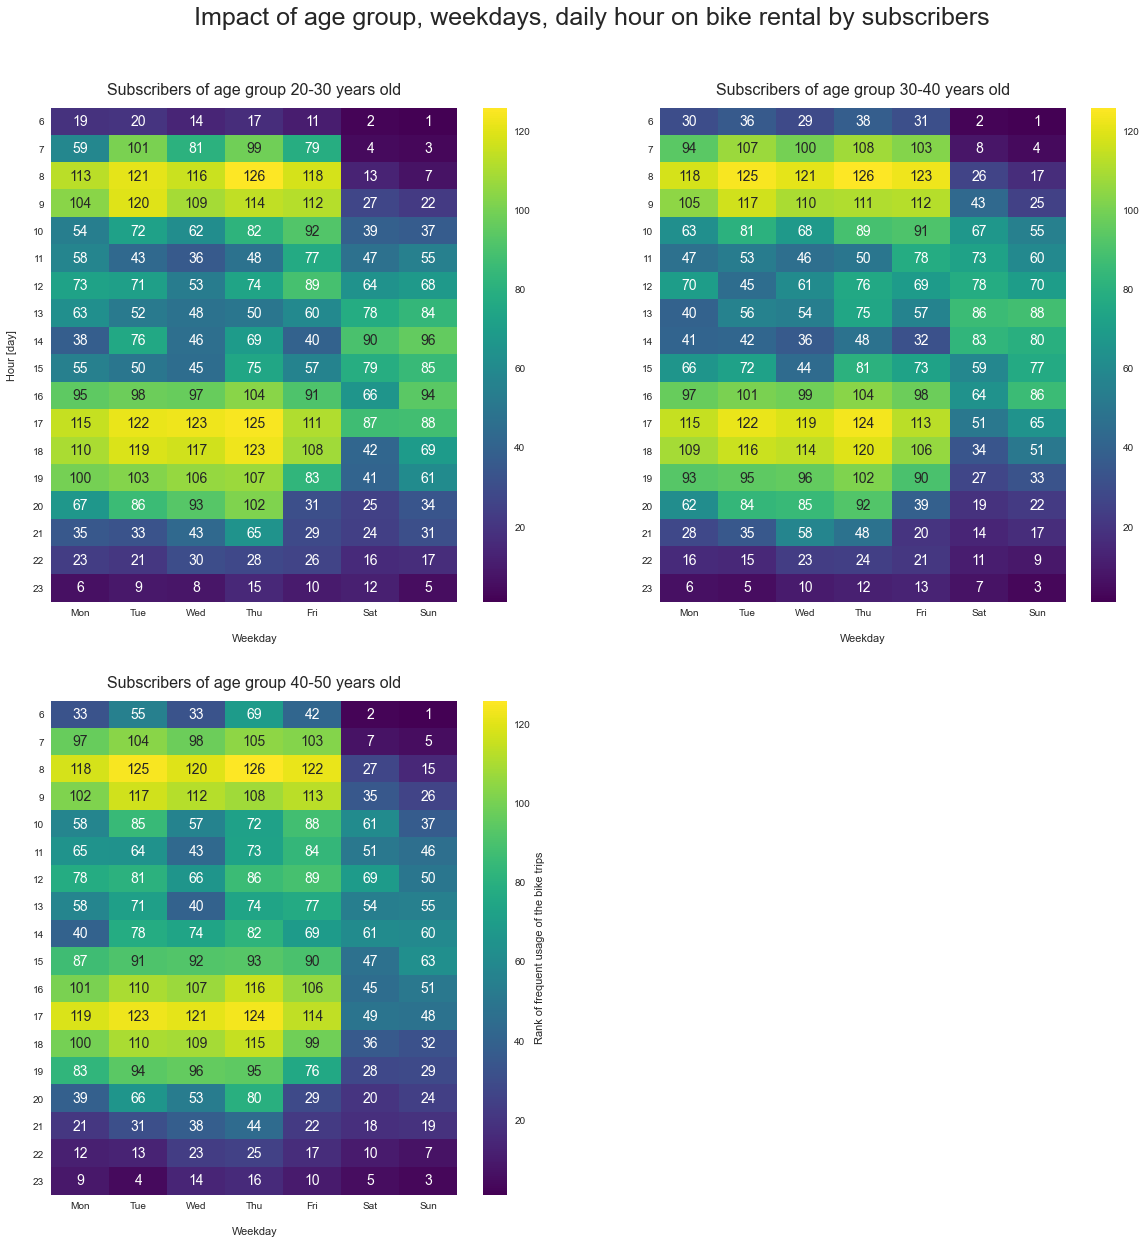

In [66]:
# Construct the heatmaps
plt.figure(figsize=(20,20))
plt.subplot(221)
plt.suptitle('Impact of age group, weekdays, daily hour on bike rental by subscribers', fontsize=25, y=0.95)
sb.heatmap(df1_subscriber_hour_pivoted, fmt='d', annot=True, cmap='viridis', annot_kws={"size": 14})
plt.title("Subscribers of age group 20-30 years old", y=1.015, fontsize=16)
plt.xlabel('Weekday', labelpad=16)
plt.ylabel('Hour [day]', labelpad=16)
plt.yticks(rotation=360)
plt.subplot(222)
sb.heatmap(df2_subscriber_hour_pivoted, fmt='d', annot=True, cmap='viridis', annot_kws={"size": 14})
plt.title("Subscribers of age group 30-40 years old", y=1.015, fontsize=16)
plt.xlabel('Weekday', labelpad=16)
plt.ylabel(' ')
plt.yticks(rotation=360)
plt.subplot(223)
sb.heatmap(df3_subscriber_hour_pivoted, fmt='d', annot=True, cmap='viridis', annot_kws={"size": 14}, cbar_kws={'label': 'Rank of frequent usage of the bike trips'})
plt.title("Subscribers of age group 40-50 years old", y=1.015, fontsize=16)
plt.xlabel('Weekday', labelpad=16)
plt.ylabel(' ')
plt.yticks(rotation=360)
plt.savefig('image1.png');

- Interestingly, when spanning the heatmaps of the 3 calculated age groups, we noticed a strong consistent correlation pattern across all of the heatmaps where the peak maximum of bike rental was at 8 am, and 5 pm on Thursday followed by Tuesday regardless to the age group. Additionally, weekends showed the lowest usage of the service for all age groups.  

# Key findings and conclusions
- Gobike sharing system is mainly used for short trips. 
- Males and females follow a consistent pattern of hourly use with peak maximum at official work hours. However, the majority   of the service users are males.
- Members within age groups 20-30, and 30-40 are the most frequent users of the service across weekdays.
- Market stations are the most frequent start stations for bike rentals that are mostly shorter trips compared to other stations.
- Subscribers constitute the majority of users and they may/may not share the bike during the entire trip, however, all customers do not.
- Subscribers have consistent pattern of using Gobike service across age groups 20-30, 30-40, 40-50, along with weekdays.